<a href="https://colab.research.google.com/github/LoveMeWithoutAll/keraspp/blob/feature%2Fch2_study/study/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [0]:
L, W, H = X_train.shape

In [0]:
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc=0)

In [0]:
def plot_acc(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuray')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc=0)

In [0]:
from keras import layers, models

class ANN(models.Sequential):
  def __init__(self, Nin, Nh, Nout):
    super().__init__()
    self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    self.add(layers.Dense(Nout, activation='softmax'))
    # self.complie(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

model = ANN(Nin=Nin, Nh=Nh, Nout=Nout)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 51us/step - loss: 0.3892 - acc: 0.8948 - val_loss: 0.2125 - val_acc: 0.9391
Epoch 2/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.1844 - acc: 0.9475 - val_loss: 0.1555 - val_acc: 0.9583
Epoch 3/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.1359 - acc: 0.9619 - val_loss: 0.1365 - val_acc: 0.9593
Epoch 4/5
48000/48000 [==============================] - 2s 46us/step - loss: 0.1071 - acc: 0.9699 - val_loss: 0.1175 - val_acc: 0.9655
Epoch 5/5
48000/48000 [==============================] - 2s 46us/step - loss: 0.0874 - acc: 0.9747 - val_loss: 0.1075 - val_acc: 0.9690


In [44]:
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy -> {:.2f}, {:2f}'.format(*performance_test))

10000/10000 [==============================] - 0s 17us/step
Test Loss and Accuracy -> 0.10, 0.971100


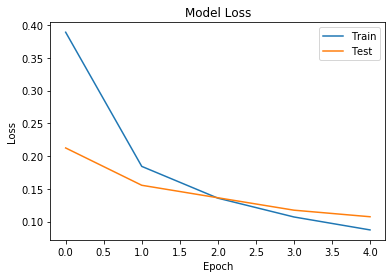

In [46]:
plot_loss(history)
plt.show()

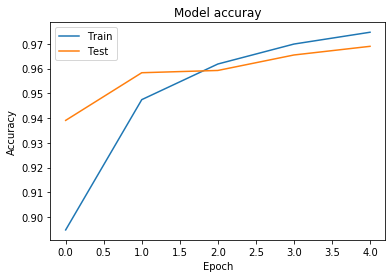

In [47]:
plot_acc(history)
plt.show()